In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Dissertation /heartdisease/heart (1).csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#SVM

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

predictors = dataset[['cp', 'thalach']]
target = dataset["target"]


# Identify Target Variable

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [5]:
X_train.shape

(242, 2)

In [6]:
from sklearn import svm

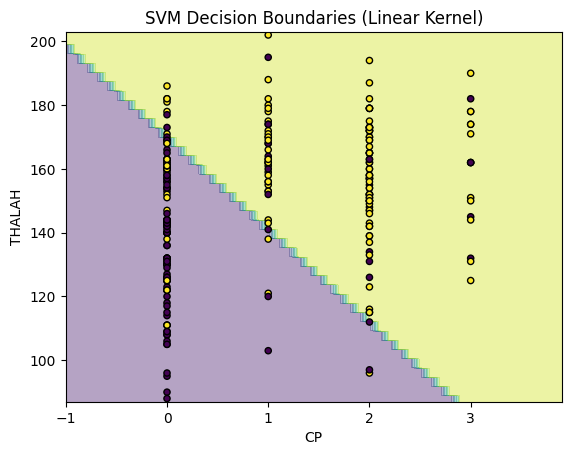

In [7]:
from sklearn import svm
# Train SVM with a kernel (e.g., linear, polynomial, or radial basis function (RBF))
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train)

# Create a meshgrid of points to plot decision boundaries
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each meshgrid point
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('CP')
plt.ylabel('THALAH')
plt.title('SVM Decision Boundaries (Linear Kernel)')
plt.show()

#KNN

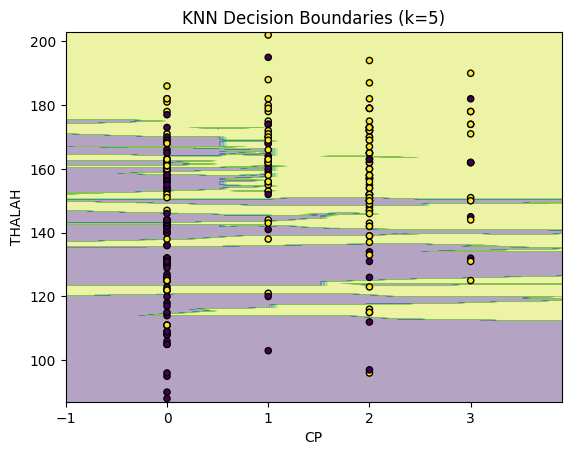

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Create a meshgrid of points to plot decision boundaries
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each meshgrid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('CP')
plt.ylabel('THALAH')
plt.title('KNN Decision Boundaries (k=5)')
plt.show()


#Decision Tree

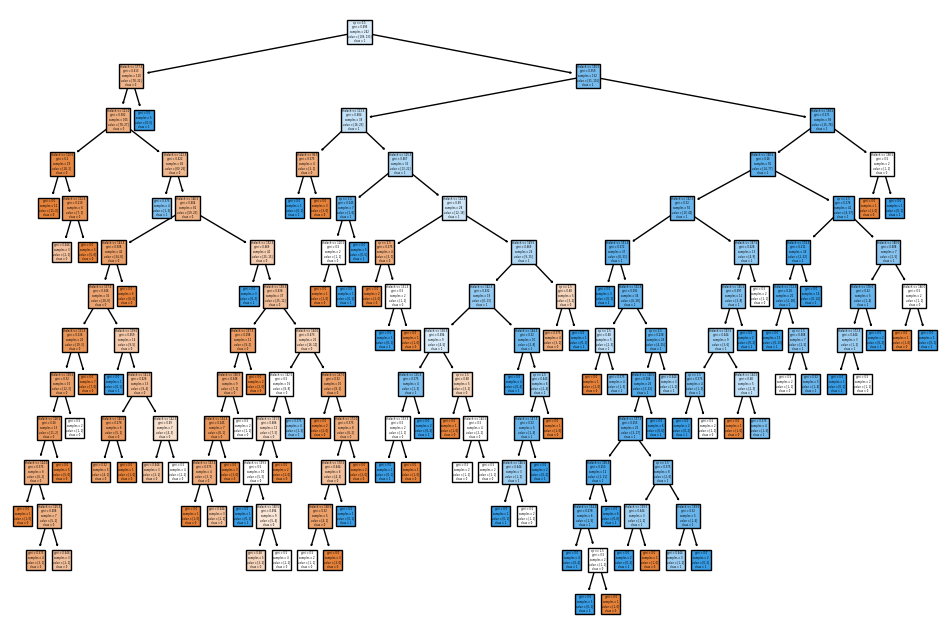

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

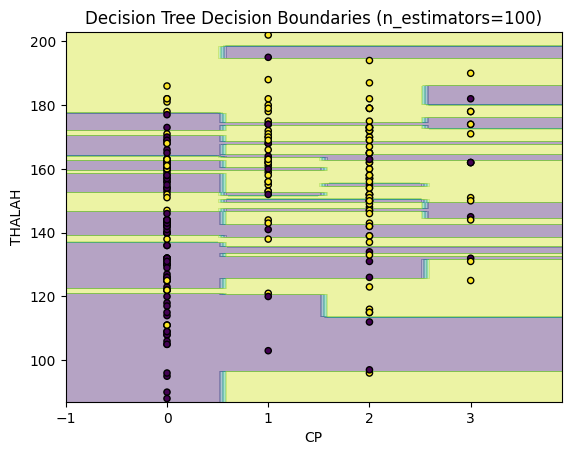

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Train Random Forest model
rf = DecisionTreeClassifier()  # You can adjust the number of trees
rf.fit(X_train, Y_train)

# Create a meshgrid of points to plot decision boundaries
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each meshgrid point
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('CP')
plt.ylabel('THALAH')
plt.title('Decision Tree Decision Boundaries (n_estimators=100)')
plt.show()

#Random Forest

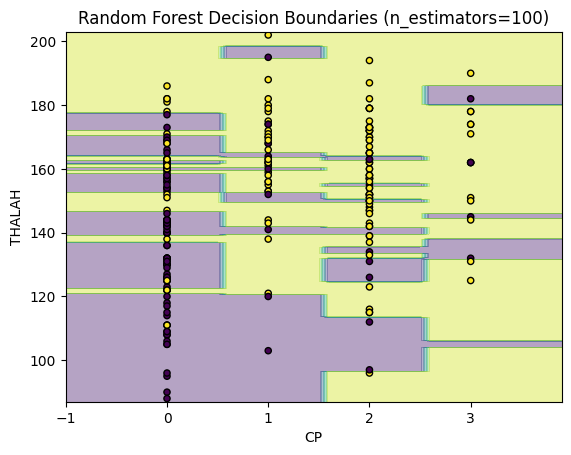

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees
rf.fit(X_train, Y_train)

# Create a meshgrid of points to plot decision boundaries
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each meshgrid point
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('CP')
plt.ylabel('THALAH')
plt.title('Random Forest Decision Boundaries (n_estimators=100)')
plt.show()


#MLP

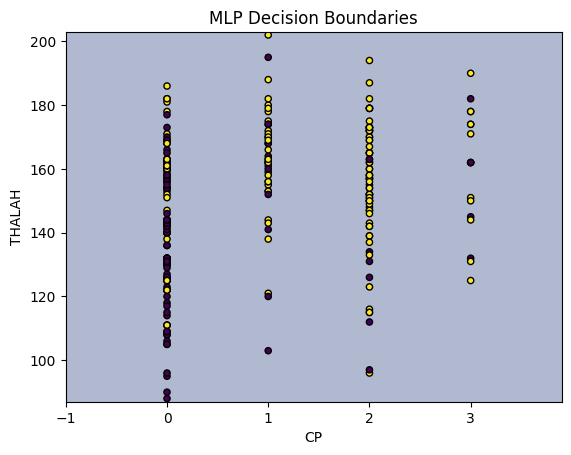

In [14]:
from sklearn.neural_network import MLPClassifier

# Train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)  # Adjust parameters as needed
mlp.fit(X_train, Y_train)

# Create a meshgrid of points to plot decision boundaries
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each meshgrid point
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('CP')
plt.ylabel('THALAH')
plt.title('MLP Decision Boundaries')
plt.show()
